In [6]:
import os
import jieba
files = os.listdir("inputData/jiebaTest")

In [7]:
ls = []
for i in files:
    with open("inputData/jiebaTest/"+i,"r") as file:
        lines = file.readlines()
        ls.append(lines)

In [8]:
lst = [item for lst in ls for item in lst]

In [9]:
for i in range(len(lst)):
    lst[i] = jieba.cut(lst[i])

In [10]:
import requests
import re

In [19]:
def gethtml(url):
    header = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.22 Safari/537.36 SE 2.X MetaSr 1.0"}
    response = requests.get(url,headers=header,timeout=30)
    response.encoding = response.apparent_encoding
    return response.text

In [11]:
def parsehtml(html,i):
    title = re.compile('"raw_title":"(.*?)"').findall(html)
    loc = re.compile('"item_loc":"(.*?)"').findall(html)
    price = re.compile('"view_price":"(.*?)"').findall(html)
    sales = re.compile('"view_sales":"(.*?)人付款"').findall(html)
    print(sales)
    with open("月饼数据"+str(i)+".txt","w",encoding="utf-8") as f:
        for i in range(len(title)):
            tlt = title[i]
            location = loc[i] if " " not in loc[i] else loc[i].split(" ")[1]
            relprice = price[i]
            number = sales[i]
            f.write(tlt+","+location+","+relprice+","+number+"\n")
    f.close()

In [13]:
import pandas as pd
f = open("inputData/月饼数据.txt","r",encoding="gbk")
df = pd.read_csv(f,sep=",",names=["title","location","price","salesNum"])

In [14]:
df.describe()

,price,salesNum
count,352.000000,352.000000
mean,150.601705,4823.130682
std,549.766542,9715.701171
min,1.300000,0.000000
25%,39.900000,720.500000
50%,88.000000,1651.500000
75%,165.750000,5327.750000
max,9999.000000,94267.000000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud,ImageColorGenerator

In [16]:
title = df.title.values.tolist()

In [17]:
title_word_lst = []
for i in title:
    word_lst = jieba.cut(i)
    title_word_lst.append(word_lst)

In [18]:
stopwords = ["月饼","礼品","口味","礼盒","包邮","【","】","送礼","大",
"中秋节","中秋月饼","2","饼","蓉","多","个","味","斤","送"," ","老",
"北京","云南","网红老"]

In [19]:
title_word_lst_clean = []
for line in title_word_lst:
    line_clean = []
    for word in line:
        if word not in stopwords:
            line_clean.append(word)
    title_word_lst_clean.append(line_clean)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\de'l'l\AppData\Local\Temp\jieba.cache
Loading model cost 1.258 seconds.
Prefix dict has been built succesfully.


In [20]:
title_word_lst_clean

[['传统', '潮式', '桥墩', '125g', '酥脆', '皮包', '邮'],
 ['大四喜', '750g', '蛋黄', '果仁', '红', '豆沙月饼'],
 ['收藏', '有礼', '新鲜', '日期', '水果', '味多', '散装', '小'],
 ['华美', '礼盒装', '广式', '散装', '蛋黄', '莲蓉', '团购', '诚挚'],
 ['广州', '皇上', '皇', '酒家', '蛋黄', '礼盒装', '员工', '传统', '白莲', '老式', '豆沙', '椰蓉'],
 ['广州', '皇上', '皇', '酒家', '双黄', '白莲', '蛋黄', '豆沙', '广式', '散装', '老式', '传统', '中秋'],
 ['顺丰', '金九', '旗舰店', '吴川', '金九伍', '仁', '金腿', '3'],
 ['顺丰', '吴川金', '九月', '伍仁', '金腿', '广式', '五仁', '手工'],
 ['顺丰', '吴川金', '九月', '伍仁', '金腿', '五仁', '礼盒装', '广式'],
 ['顺丰', '金九', '旗舰店', '吴川金', '九月', '伍仁', '金腿', '中秋', '礼盒装'],
 ['顺丰', '金九伍', '仁', '4', '吴川金', '九月', '伍仁', '金腿', '五仁'],
 ['顺丰', '吴川金', '九月', '伍仁', '金腿', '五仁大', '4'],
 ['广东', '吴川华情', '传统', '手工', '伍仁', '金腿', '装五仁', '火腿', '广式', '肉松', '中秋'],
 ['百威', '蛋黄', '白莲', '黑芝麻', '礼盒装', '广东', '广式', '老式', '非', '散装'],
 ['黄家', '月', '五仁', '叉烧', '合浦', '公馆', '黄记', '广西', '老式', '中秋'],
 ['化州', '梅元居', '3', '伍仁', '金腿', '五仁大', '三斤', '团购'],
 ['BACK', '那么', '团圆', '300g', '麻薯', '肉松', '蛋黄', '酥', '手工'],
 ['华美', '双', '蛋黄', '白莲', 

In [21]:
title_word_lst_dist = []
for i in title_word_lst_clean:
    line_dist = []
    for word in i:
        if word not in line_dist:
            line_dist.append(word)
    title_word_lst_dist.append(line_dist)

In [22]:
allwords_clean_dist = []
for i in title_word_lst_dist:
    for j in i:
        allwords_clean_dist.append(j)

In [23]:
df1 = pd.DataFrame(allwords_clean_dist,columns=["allwords"]) 

In [24]:
df2 = df1.allwords.value_counts().reset_index()

In [1]:
df2.columns = ["words","count"]

AttributeError: 'list' object has no attribute 'reset_index'

In [26]:
df2.head()

,words,count
0,蛋黄,148
1,广式,144
2,礼盒装,143
3,中秋,124
4,团购,101


In [27]:
backgroundImg = plt.imread("inputData/03.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'inputData/03.jpg'

In [29]:
wc = WordCloud(width=1024,height=768,background_color="white",font_path="c://simhei.ttf",max_font_size=400,random_state=50)

In [30]:
wc

In [32]:
{x[0]:x[1] for x in df2.head(100).values}

{'蛋黄': 148,
 '广式': 144,
 '礼盒装': 143,
 '中秋': 124,
 '团购': 101,
 '散装': 101,
 '莲蓉': 82,
 '五仁': 76,
 '传统': 63,
 '豆沙': 56,
 '老式': 50,
 '糕点': 49,
 '特产': 45,
 '手工': 41,
 '高档': 40,
 '白莲': 39,
 '双黄': 30,
 '冰皮': 29,
 '水果': 27,
 '批发': 25,
 '流心': 24,
 '火腿': 24,
 '顺丰': 23,
 '酥皮': 23,
 '金腿': 22,
 '员工': 21,
 '黄': 20,
 '伍仁': 20,
 '香港': 20,
 '零食': 20,
 '广州': 19,
 '广东': 19,
 '巧克力': 19,
 '8': 18,
 '云腿': 18,
 '酒家': 17,
 '稻香村': 17,
 '网红': 15,
 '创意': 15,
 '2018': 15,
 '10': 14,
 '上海': 14,
 '酥': 14,
 '*': 13,
 '华美': 13,
 '流心奶': 13,
 '东北': 12,
 '鲜肉': 12,
 '克': 12,
 '枣泥': 12,
 '枚': 12,
 '伴月': 11,
 '叉烧': 11,
 '迷你': 11,
 '铁盒': 11,
 '桥墩': 11,
 '杏花楼': 11,
 '七星': 11,
 '苏式': 11,
 '九月': 11,
 '月': 11,
 '仁': 11,
 '皇': 11,
 '小': 10,
 '温州': 10,
 '芝麻': 10,
 '台湾': 9,
 '双': 9,
 '榴莲': 9,
 '5': 9,
 '6': 8,
 '皇上': 8,
 '宣威': 8,
 '750g': 8,
 '进口': 8,
 '椰蓉': 8,
 '黑芝麻': 8,
 '美心': 8,
 '定制': 7,
 '斤装': 7,
 '吴川金': 7,
 '滇式': 7,
 '心': 7,
 '凤梨': 7,
 '提篮': 7,
 '个装': 6,
 '100g': 6,
 '港式': 6,
 '720g': 6,
 '和': 6,
 '桃山': 6,
 '五仁大': 6,
 '荣庆': 

In [31]:
wc = wc.fit_words({x[0]:x[1] for x in df2.head(100).values})
wc

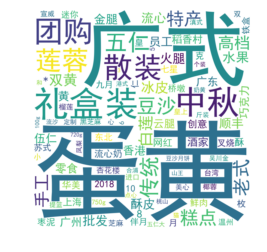

In [78]:
plt.axis("off")
plt.imshow(wc,interpolation="bilinear")

In [79]:
wc.to_file("yuebing.jpg")

In [90]:
w_s_sum = []
for word in df2.words:
    i = 0
    s_lst = []
    for j in title_word_lst_clean:
        if word in j:
            s_lst.append(df.salesNum[i])
        i+=1
    w_s_sum.append(sum(s_lst))

In [91]:
df3 = pd.DataFrame(w_s_sum,columns=["w_s_sum"])

In [94]:
df4 = pd.concat([df2,df3],axis=1)

In [98]:
df5 = df4.sort_values("w_s_sum",ascending=False)

In [2]:
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(df5["words"],df5["w_s_sum"])

NameError: name 'plt' is not defined